## Iris(붓꽃) 예측모델
### 머신러닝의 Helloworld

- 데이터 과학에서 Iris DataSet
    - 아이리스 품종 중 Setosa, Versicolor, Virginica 분류에 대한 [**로널드 피셔**](https://ko.wikipedia.org/wiki/%EB%A1%9C%EB%84%90%EB%93%9C_%ED%94%BC%EC%85%94)의  1936년 논문에서 사용된 데이터 셋.

## 데이터셋 확인하기

### scikit-learn 내장 데이터셋 가져오기
- scikit-learn은 머신러닝 모델을 테스트 하기위한 데이터셋을 제공한다.
    - 이런 데이터셋을 Toy dataset이라고 한다.
- 패키지 : sklearn.datasets
- 함수   : load_xxxx()

### scikit-learn 내장 데이터셋의 구성
- scikit-learn의 dataset은 딕셔너리 구조의 Bunch 클래스 객체이다.
    - keys() 함수로 key값들을 조회
- 구성
    - **target_names**: 예측하려는 값(class)을 가진 문자열 배열
    - **target**: Label(출력데이터)
    - **data**: Feature(입력변수)
    - **feature_names**: 입력변수 각 항목의 이름
    - **DESCR**: 데이터셋에 대한 설명

In [1]:
import sklearn
sklearn.__version__

'1.7.2'

In [2]:
# sklearn.datasets : 사이킷런에서 데이터셋을 제공하는 모듈
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [3]:
# Bunch의 구성 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# input data (Features)
X = iris['data']
X2 = iris.data
print(type(X), type(X2))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
# output data (Lavel, Target)
y = iris['target']
y2 = iris.target
print(type(y), type(y2))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
# input data 확인
print('shape:', X.shape) # (150: 데이터 개수, 4: feature 개수-한 개 데이터 구성.)
print(X[:3])

shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [7]:
print("각 feature(4개)가 어떤 값인지 확인")
iris['feature_names']

각 feature(4개)가 어떤 값인지 확인


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# output data (target, label)
import numpy as np
print('shape:', y.shape) #(150: 데이터 개수,)
print(y[:5])
print('y의 class-범주값 조회:', np.unique(y))

shape: (150,)
[0 0 0 0 0]
y의 class-범주값 조회: [0 1 2]


In [9]:
## y의 범주값의 이름(단어)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### 위 데이터 셋을 판다스 데이터프레임으로 구성
- 데이터 프레임 생성 후 데이터 확인
  
> - **dataframe/Series.apply(함수)**
>     - (dataframe) 함수에 DataFrame의 컬럼(Series)를 전달해서 처리된 값들을 모아 반환
>     - (Series) 함수에 원소들을 전달해서 처리된 값들을 모아서 반환
>     - 일괄처리시 사용하는 메소드

In [10]:
import pandas as pd
X = iris.data
y = iris.target
columns = [v.replace(" (cm)", "") for v in iris.feature_names]
target_names = iris.target_names

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df = pd.DataFrame(X, columns=columns)
df['species'] = y
df['species'] = df['species'].apply(lambda v : target_names[v])
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
df.groupby('species')['petal width'].mean()

species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal width, dtype: float64

## 머신러닝을 이용한 예측

### 문제 정의
> 내가 발견한 Iris 꽃받침(Sepal)의 길이(length)와 폭(width)이 각각 5cm, 3.5cm이고 꽃의 꽃잎(Petal)의 길이와 폭은 각각 1.4cm, 0.25cm이 이었다. 이 꽃는 Iris의 무슨 종일까?

### 규칙기반으로 찾아보기
- 꽃받침(Sepal)의 길이(length): 5cm, 폭(width): 3.5cm
- 꽃잎(Petal) 의 길이(length): 1.4cm, 폭(width): 0.25cm

In [14]:
df[(df['sepal length'] == 5) & (df['sepal width'] == 3.5)]

,sepal length,sepal width,petal length,petal width,species
40,5.0,3.5,1.3,0.3,setosa
43,5.0,3.5,1.6,0.6,setosa


### 머신러닝 적용

#### 머신러닝으로 우리가 하려는 것
<font size='3'><b> 프로그래머가 직접 규칙(패턴)을 만드는 것 대신 컴퓨터가 데이터를 학습하여 규칙을 자동으로 만들도록 하는 것.</b></font>

#### 결정트리 모델을 이용해 머신러닝 구현
1. import 모델
2. 모델 생성
3. 모델 학습시키기
4. 예측 

##### 1. import 모델

In [15]:
from sklearn.tree import DecisionTreeClassifier

##### 2. 모델생성 

In [16]:
# 모델 클래스의 instance 생성
tree = DecisionTreeClassifier() ### X+n
tree

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


##### 3. 모델 학습

In [17]:
# 학습 시키는 데이터에 맞는 파라미터의 값(n)을 찾는 작업. (모델을 데이터에 맞춘다)
## 모델.fit(input_data,  output_data)
tree.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
X.shape, y.shape

((150, 4), (150,))

In [19]:
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


##### 4. 예측
- 내가 본 iris 꽃의 꽃잎/꽃받침의 길이, 너비를 재서 종류를 예측한다. 

In [20]:
# 추론할 대상 입력데이터(feature). shape은 X와 동일 (개수, 4) ==> 1개추론 (1, 4)

new_data = [
    [5, 3.5, 1.4, 0.25],
    [3, 2.5, 3.4, 2.25]
]

result = tree.predict(new_data)
print(result)
print(target_names[result])

[0 1]
['setosa' 'versicolor']


### 그런데 이 결과가 맞을까?
- 모델이 추론한 결과가 맞다는 것을 어떻게 보증할 수 있을까?
- 모델을 최종 서비스에 적용하기 전에 모델의 성능을 확인하는 작업이 필요하다.

### 훈련데이터셋과 평가(테스트)데이터 분할
- 위의 예는 우리가 만든 모델이 성능이 좋은 모델인지 나쁜 모델인지 알 수 없다.
- 전체 데이터 셋을 두개의 데이터셋으로 나눠 하나는 모델을 훈련할 때 사용하고 다른 하나는 그 모델을 평가할 때 사용한다.
- 보통 훈련데이터와 테스트데이터의 비율은 8:2 또는 7:3 정도로 나누는데 데이터셋이 충분하다면 6:4까지도 나눈다.

#### 데이터셋 분할시 주의
- 분류 문제의 경우 각 클래스(분류대상)가 같은 비율로 나뉘어야 한다. 

### scikit-learn의  train_test_split() 함수를 이용해 iris 데이터셋 분할
-  train_test_split() : 하나의 데이터셋을 두개의 세트로 분할 하는 함수

In [21]:
# Train/Test data set으로 전체 dataset을 나누기.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,                  # 나눌 입력 데이터(Features)
    y,                  # 나눌 출력 데이터(Target)
    test_size = 0.2,    # 나눌 비율 test_size의 전체 대비 비율 지정. (정수: 개수) train:test = 0.8:0.2
    stratify = y,       # 분류 문제 데이터 셋일 때 설정. class 별로 동일한 비율이 되도록 나눈다.
    shuffle = True,     # 나누기 전에 데이터를 섞어준다. (default: True)
    random_state = 0    # random seed값 설정.
)

In [22]:
X.shape, y.shape

((150, 4), (150,))

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [24]:
np.unique(y, return_counts=True) # unique값과 각 unique값들의 개수

(array([0, 1, 2]), array([50, 50, 50]))

### 모델생성

In [25]:
tree2 = DecisionTreeClassifier()

### 모델 학습

In [26]:
tree2.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 평가
- 머신러닝 평가지표 함수들은 sklearn.metrics 모듈에 있다.
- 정확도(accuracy)
    - accuracy_score() 함수 이용    
    - 전체 예측한 개수 중 맞춘 개수의 비율

In [27]:
from sklearn.metrics import accuracy_score
pred = tree2.predict(X_test)
score = accuracy_score(y_test, pred)
print('정확도:', score)

정확도: 0.9666666666666667


- **혼동행렬 (Confusion Matrix)** 을 통해 확인
    - 모델이 예측한 결과와 실제 정답간의 개수를 표로 제공
    - 분류의 평가 지표로 사용된다.
    - sklearn.metrics 모듈의 confusion_matrix() 함수 이용
    - 결과 ndarray 구조
        - axis=0의 index: 정답(실제)의 class 
        - axis=1의 index: 예측결과의 class
        - value: 개수(각 class별 정답/예측한 개수)

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
c_matrix  = confusion_matrix(y_test, pred) # (정답, 모델추정)

In [29]:
c_matrix

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]])

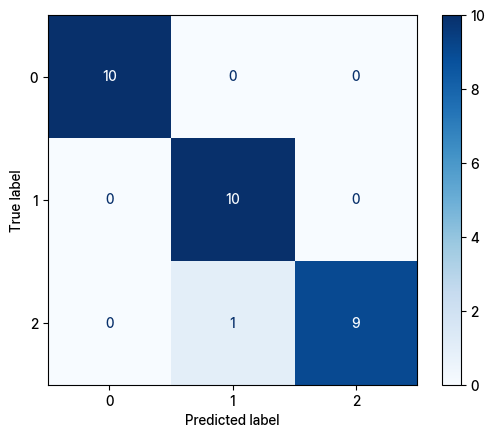

In [30]:
disp = ConfusionMatrixDisplay(c_matrix)
disp.plot(cmap='Blues');

## 행: 정답 class, 열: 모델추정 class, 값: 개수

In [31]:
## 새로운 데이터 추청
tree2.predict(new_data)

array([0, 2])